# Logistic Regression — evaluation

Load cleaned loan data, train a Logistic Regression, show Confusion Matrix and ROC curve, and give a concise interpretation.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
# Load data
path = r"c:\Users\madha\PycharmProjects\Elective_ML_2\PortalQuestions\Data\ML374_S8_Concept_Loan_Cleaned_Data.csv"
df = pd.read_csv(path)
df.shape, df.columns.tolist()

((9578, 13),
 ['int.rate',
  'installment',
  'log.annual.inc',
  'dti',
  'days.with.cr.line',
  'revol.bal',
  'revol.util',
  'inq.last.6mths',
  'delinq.2yrs',
  'pub.rec',
  'purpose.enc',
  'credit.policy',
  'not.fully.paid'])

In [3]:
# Prepare features and target
target = 'not.fully.paid'
X = df.drop(columns=[target])
y = df[target]
print('Target distribution:\n', y.value_counts(normalize=True))

# Train / test split (stratify to keep class proportions)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Target distribution:
 not.fully.paid
0    0.839946
1    0.160054
Name: proportion, dtype: float64


In [4]:
# Train Logistic Regression
clf = LogisticRegression(solver='liblinear', max_iter=1000)
clf.fit(X_train_scaled, y_train)

# Predictions and probabilities
y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)[:, 1]

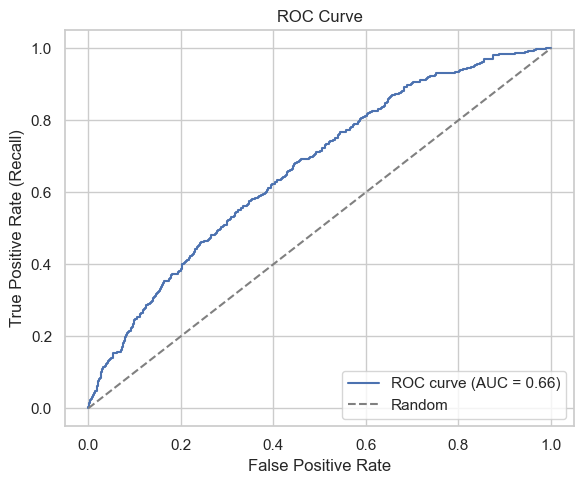

In [7]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Brief interpretation and next steps

- The printed metrics (accuracy, precision, recall, F1, ROC AUC) and the confusion matrix show how the model performs on each class.
- If recall for the "not repaid (1)" class is very low while accuracy is moderate/high, the model is missing many actual defaults (unacceptable if the goal is to catch defaulters).
- Use ROC AUC and ROC curve to assess separability; values close to 0.5 mean little discrimination.
- Recommended next steps: address class imbalance (resampling / class_weight), tune regularization (C), try other models (tree-based), and evaluate with precision-recall curve if positives are rare.